In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('nyt_data.txt',sep ='\n',header = None)
vocab = pd.read_csv('nyt_vocab.dat',sep = '\n',header = None,names =['words'])
print(data)

                                                      0
0     1946:2,1168:2,1194:2,1275:1,777:1,522:1,107:1,...
1     905:1,1962:1,38:2,421:1,294:1,424:1,2958:1,451...
2     162:1,424:1,812:1,266:2,1780:1,262:2,2697:1,12...
3     383:1,304:1,2232:1,294:3,195:2,2265:1,1773:1,7...
4     1849:2,176:1,905:2,2:1,38:2,398:1,173:1,259:1,...
...                                                 ...
8442  70:1,2525:1,46:1,537:1,714:1,1192:1,648:1,1314...
8443  1895:1,1177:1,2916:1,861:1,1168:1,15:1,598:1,1...
8444  350:2,1467:1,176:1,1093:1,1910:2,1712:1,670:2,...
8445  981:1,1671:1,50:1,680:1,586:2,2124:1,325:1,12:...
8446  383:1,2:2,1981:1,2735:1,1001:2,92:2,3:1,42:1,3...

[8447 rows x 1 columns]


In [3]:
M =data.shape[0]
N =vocab.shape[0]

#creating the Matrix X and populating it with values from nyt_data.txt file
X = np.zeros((N,M))

for col in range(M):
    row = data.iloc[col].values[0].split(',')
    for word in row:
        index,count = map(int,word.split(':'))
        X[index-1][col]=count


In [4]:
small_value =1e-16
iterations =100
rank = 25
W= np.random.uniform(1,2,(N,rank))
H= np.random.uniform(1,2,(rank,M))
penalty_list=[]
for run in range(iterations):
    print(run)
    #updating the value of H
    X_WH= X/(np.dot(W,H)+small_value)
    
    w_t=W.T
    w_t = w_t/w_t.sum(axis=1).reshape(-1,1)#normalizing the W_T
    
    H=H*(np.dot(w_t,X_WH))
    
    #updating the value of W
    X_WH= X/(np.dot(W,H)+small_value)
    
    h_t=H.T

    h_t = h_t/h_t.sum(axis=0).reshape(1,-1)#normalizing the H_T
    
    W=W*(np.dot(X_WH,h_t))
    
    #Updating the penalty function
    penalty=np.sum((-X*np.log(np.dot(W,H)+small_value))+ np.dot(W,H))
    penalty_list.append(penalty)
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Text(0.5, 1.0, 'Objective Function plot for v/s iterations')

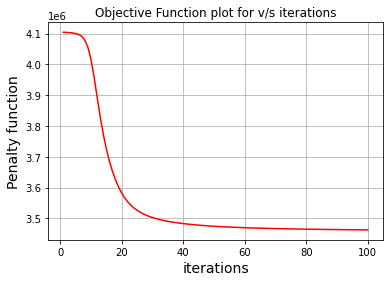

In [5]:
#print(penalty_list)
plt.figure()
plt.plot(np.arange(1, 101),penalty_list, color='red')
plt.grid()
plt.ylabel('Penalty function', fontsize=14)
plt.xlabel('iterations', fontsize=14)
plt.title('Objective Function plot for v/s iterations')


# Part B
    

In [6]:
W=W/W.sum(axis=0).reshape(1,-1)
print(W.shape)

(3012, 25)


In [7]:
names = np.loadtxt('nyt_vocab.dat', dtype=object)
print(names)

['company' 'percent' 'state' ... 'glad' 'harder' 'lucrative']


In [8]:
top_10=[]
for i in range(rank):
    index=np.argsort(W[:,i])
    index=index[-10:]
    #print(index)
    top_10_names =[names[j] for j in index]
    top_10_values = [W[j,i] for j in index]
    top_10.append((top_10_names,top_10_values))
for i in range(rank):
    print(f"List {i+1} is as follows")
    print('----------------------------------')
    for j in range(10):
        print(f"{top_10[i][0][j]}-{top_10[i][1][j]}" )
    print('----------------------------------\n')

List 1 is as follows
----------------------------------
create-0.007272560317224677
large-0.007602564810500689
foot-0.008064716991949751
space-0.009367842783102138
design-0.010237238715437887
center-0.011572688622638622
project-0.012474387498850303
building-0.012823182216259622
build-0.014225703433704025
city-0.014746506287609222
----------------------------------

List 2 is as follows
----------------------------------
keep-0.007736730983117864
little-0.00877087659469703
put-0.00881699622046857
happen-0.010152506255838628
really-0.011205562341474769
lot-0.012036106464290122
feel-0.013237813814258582
ask-0.013314655747815192
tell-0.013802423177113417
thing-0.019262442971356392
----------------------------------

List 3 is as follows
----------------------------------
vice-0.009598344969024482
service-0.010668617347328132
advertising-0.011075692140424902
business-0.013052942870873408
network-0.013208335237872825
name-0.013858252712187895
television-0.017068593748139755
executive-0.01760

(('mean', 0.00454309491875303), ('easy', 0.004554797777743211), ('power', 0.00492381873684738), ('surface', 0.0052784907904711706), ('far', 0.00532334434584382), ('problem', 0.005386595833013535), ('plant', 0.005426914912239366), ('size', 0.005995745307861566), ('keep', 0.006361607249151827), ('small', 0.0068108674646056334))
